# Confocal-Sample20 - Analysis Partner

In [2]:
import pickle
import h5py
import matplotlib.pyplot as plt
%matplotlib widget

In [168]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1646940613.pkl','rb'))


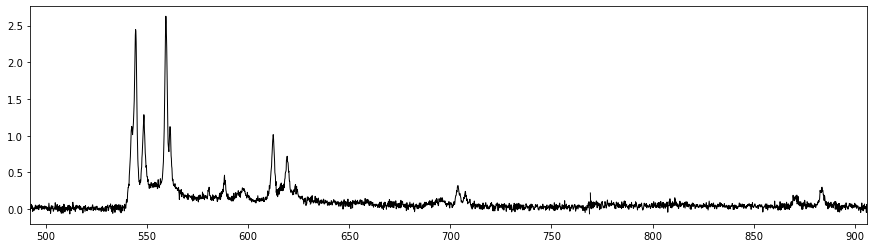

In [169]:
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
for cwave in spectrum:
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    all_waves.append(list(waves))
    all_PL.append(PL)
    all_std.append(std)
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(min_wave, max_wave)
plt.show()
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1646940613.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves)
    h5file.create_dataset('/PL',data=all_PL)
    h5file.create_dataset('/energies',data=all_std)

# Pixis Intensity Calibration

In [170]:
import numpy as np

In [171]:
ground_truth = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/intensical - 1646945002.pkl','rb'))
ground_truth = np.array([ground_truth['waves'], ground_truth['signal_avg']/np.max(ground_truth['signal_avg'])]).T
for_reals =  pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/intensical - 1646944838.pkl','rb'))
for_reals = np.array([for_reals['waves'], for_reals['signal_avg']/np.max(for_reals['signal_avg'])]).T
old_ref = np.genfromtxt('../data/intensical_ref.csv',delimiter=',')
old_ref[:,1] = old_ref[:,1]/np.max(old_ref[:,1])

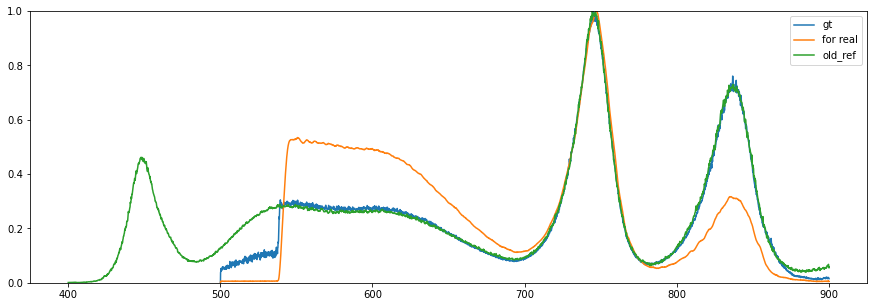

In [172]:
plt.figure(figsize=(15,5))
# plt.plot(ground_truth['waves'],ground_truth['signal_avg']/np.max(ground_truth['signal_avg']),label='gt')
# plt.plot(for_reals['waves'],for_reals['signal_avg']/np.max(for_reals['signal_avg']),label='actual')
plt.plot(ground_truth[:,0], ground_truth[:,1],label='gt')
plt.plot(for_reals[:,0], for_reals[:,1],label='for real')
plt.plot(old_ref[:,0], old_ref[:,1],label='old_ref')
plt.ylim(0,1)
plt.legend()
plt.show()

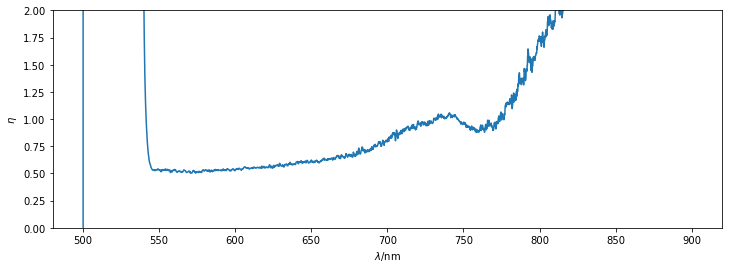

In [176]:
# calibration factor
eta_y = np.interp(for_reals[:,0],old_ref[:,0],old_ref[:,1])/for_reals[:,1]
eta_x = for_reals[:,0]
plt.figure(figsize=(12,4))
plt.plot(for_reals[:,0],np.interp(for_reals[:,0],old_ref[:,0],old_ref[:,1])/for_reals[:,1])
plt.ylim(0,2)
plt.xlabel('$\lambda$/nm')
plt.ylabel('$\eta$')
plt.show()

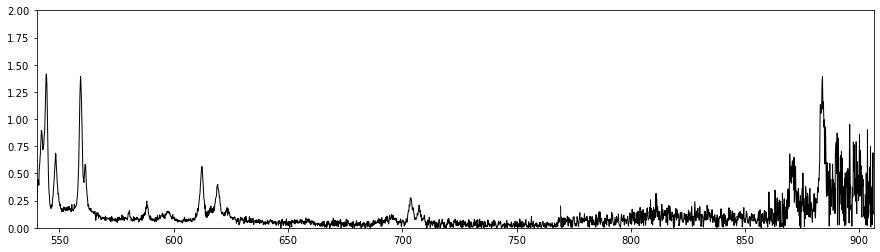

In [178]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1646940613.pkl','rb'))

plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    cal = np.abs(np.interp(waves, eta_x, eta_y))
    PL = np.abs(PL * cal)
    std = std * cal
    all_waves.append(list(waves))
    all_PL.append(PL)
    all_std.append(std)
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0,2)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
selector = np.array(all_waves) >= 540
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1646940613.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves[selector])
    h5file.create_dataset('/PL',data=all_PL[selector])
    h5file.create_dataset('/std',data=all_std[selector])

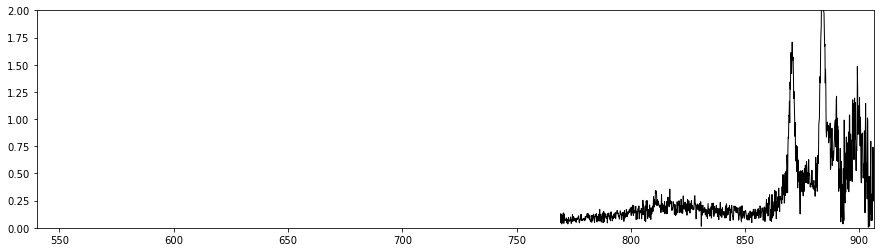

In [175]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1646954485.pkl','rb'))
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    cal = np.abs(np.interp(waves, eta_x, eta_y))
    PL = np.abs(PL * cal)
    std = std * cal
    all_waves.append(list(waves))
    all_PL.append(PL)
    all_std.append(std)
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0,2)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
selector = np.array(all_waves) >= 540
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1646954485.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves[selector])
    h5file.create_dataset('/PL',data=all_PL[selector])
    h5file.create_dataset('/std',data=all_std[selector])

# 1647006858

In [285]:
spectra = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647009688.pkl','rb'))
all_waves = []
all_pl = []
all_stdevs = []
for cwave in sorted(spectra.keys()):
    spectrum = spectra[cwave]
    signals = spectrum['signals']
    mean_signal = np.mean(signals,axis=0)
    medians = np.median(signals, axis=0)
    stdevs = np.std(signals, axis=0)
    good_means = []
    good_stdevs = []
    for signal_col, median in zip(signals.T, medians):
        diffs = np.abs(signal_col - median)/median
        good_ones = diffs < 2
        good_mean = np.mean(signal_col[good_ones])
        good_means.append(good_mean)
        good_stdevs.append(np.std(signal_col[good_ones]))
    all_pl.extend(good_means)
    all_stdevs.extend(good_stdevs)
    all_waves.extend(spectrum['waves'])
all_waves= np.array(all_waves)
all_pl = np.array(all_pl)
all_stdevs = np.array(all_stdevs)
cal = np.abs(np.interp(all_waves, eta_x, eta_y))
all_pl = all_pl*cal
all_stdevs = all_stdevs*cal
noprob = (~np.isnan(all_pl)) & (all_waves > 540)
all_pl = all_pl[noprob]
all_stdevs = all_stdevs[noprob]
all_waves = all_waves[noprob]
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647009688.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves)
    h5file.create_dataset('/PL',data=all_pl)
    h5file.create_dataset('/std',data=all_stdevs)

<ipython-input-285-83a2c2204314>:14: RuntimeWarning: divide by zero encountered in true_divide
  diffs = np.abs(signal_col - median)/median
<ipython-input-285-83a2c2204314>:14: RuntimeWarning: invalid value encountered in true_divide
  diffs = np.abs(signal_col - median)/median
/Users/juan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/juan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/juan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/juan/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, d

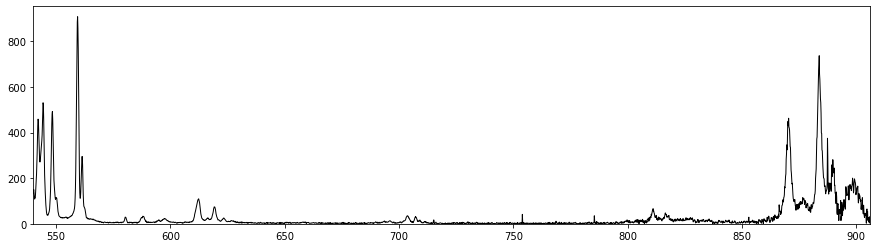

In [288]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647006858.pkl','rb'))

plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    cal = np.abs(np.interp(waves, eta_x, eta_y))
    PL = np.abs(PL * cal)
    std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
selector = np.array(all_waves) >= 540
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20D - batch - 1647006858.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves[selector])
    h5file.create_dataset('/PL',data=all_PL[selector])
    h5file.create_dataset('/std',data=all_std[selector])

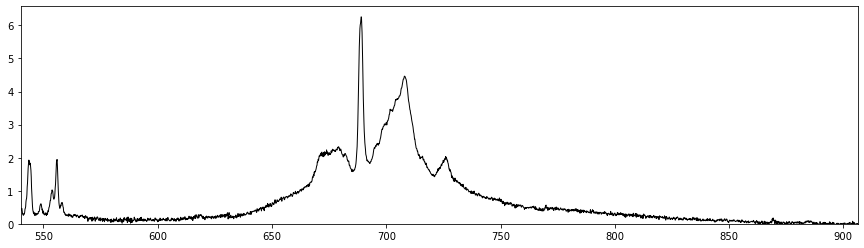

In [307]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20A - batch - 1646770373.pkl','rb'))
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
all_bkg = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    # cal = np.abs(np.interp(waves, eta_x, eta_y))
    # PL = np.abs(PL * cal)
    # std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    for bgk in spectrum[cwave]['bkg']:
        all_bkg.append(bgk[0][:,1])
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
selector = np.array(all_waves) >= 540
all_bkg = np.array(all_bkg)
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/PL sample 20A - batch - 1646770373.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves[selector])
    h5file.create_dataset('/PL',data=all_PL[selector])
    h5file.create_dataset('/std',data=all_std[selector])
    h5file.create_dataset('/abkg',data=all_bkg)

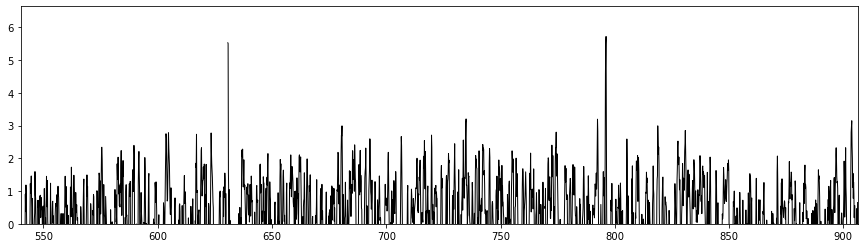

In [305]:
spectrum = pickle.load(open('/Volumes/jlizaraz/ZiaLab/Log/Data/baseline - batch - 1647037916.pkl','rb'))
plt.figure(figsize=(15,4))
min_wave = 1e12
max_wave = -1e12
all_waves = []
all_PL = []
all_std = []
all_bkg = []
for cwave in sorted(spectrum.keys()):
    waves = spectrum[cwave]['waves']
    PL = spectrum[cwave]['signal_avg']
    std = spectrum[cwave]['signal_std']
    # cal = np.abs(np.interp(waves, eta_x, eta_y))
    # PL = np.abs(PL * cal)
    # std = std * cal
    all_waves.extend(list(waves))
    all_PL.extend(PL)
    all_std.extend(std)
    for bgk in spectrum[cwave]['bkg']:
        all_bkg.append(bgk[0][:,1])
    plt.plot(waves,PL,'k-',lw=1)
    min_wave = min(min_wave, min(waves))
    max_wave = max(max_wave, max(waves))
plt.xlim(540, max_wave)
plt.ylim(0)
plt.show()
all_waves= np.array(all_waves)
all_PL = np.array(all_PL)
all_std = np.array(all_std)
sorter = np.argsort(all_waves)
all_waves = all_waves[sorter]
all_PL = all_PL[sorter]
all_std = all_std[sorter]
selector = np.array(all_waves) >= 540
all_bkg = np.array(all_bkg)
with h5py.File('/Volumes/jlizaraz/ZiaLab/Log/Data/baseline - batch - 1647037916.h5','w') as h5file:
    h5file.create_dataset('/waves',data=all_waves[selector])
    h5file.create_dataset('/PL',data=all_PL[selector])
    h5file.create_dataset('/std',data=all_std[selector])
    h5file.create_dataset('/abkg',data=all_bkg)

In [103]:
import pandas as pd

In [104]:
lines = pd.read_pickle('/Users/juan/ZiaLab/Codebase/zialab/data/NIST/nist_atomic_spectra_database_lines.pkl')

In [127]:
for index, row in lines[(np.abs(lines['obs_wl_vac(nm)'] - 871) < 4) & (np.abs(lines['obs_wl_vac(nm)']-884) < 4)].iterrows():
    element = (row['element'])
    print(element)
    if element in ['Nb']:
        print('-----')
        print(row)

In [162]:
RE_lines = lines[lines['element'].apply(lambda x: x in 'La Ce Pr Nd Pm Sm Eu Gd Tb Dy Ho Er Tm Yb'.split(' '))]
RE_lines.reset_index(inplace=True)

In [166]:
m_lines = RE_lines[(RE_lines['obs_wl_vac(nm)'] < 900) & (RE_lines['obs_wl_vac(nm)'] > 850)]
m_lines.reset_index(inplace=True)
diffs = [idx for l0, l1, idx in zip(m_lines['obs_wl_vac(nm)'], m_lines['obs_wl_vac(nm)'], m_lines.index) if abs(abs(l0-l1) - 13) < 13.1]
len(diffs)

104

In [ ]:
plt.ion()

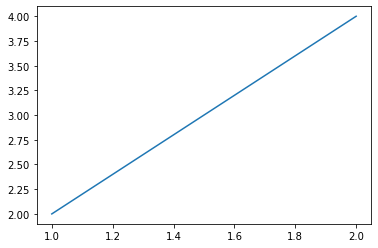

In [323]:
fig, ax = plt.subplots()
p0 = ax.plot([1,2],[2,4])

In [326]:
p0[0].set_xdata([2,4])
fig.canvas.draw()
import time

In [335]:
%matplotlib widget

In [4]:
import numpy as np

In [ ]:
x = np.linspace(0, 10*np.pi, 100)
y = np.sin(x)

# The really important command for interactive plot updating
plt.ion()

# sizing of the plots figure sizes 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 3

# Two figures 
# -----------
fig1 = plt.figure(1)
fig2 = plt.figure(2)

# first figure with two plot-areas with axes 
# --------------------------------------------
ax1_1 = fig1.add_subplot(121)
ax1_2 = fig1.add_subplot(122)

fig1.canvas.draw()

# second figure with just one plot area with axes
# -------------------------------------------------
ax2 = fig2.add_subplot(121)
line1, = ax2.plot(x, y, 'b-')
fig2.canvas.draw()

z= 32
b = np.zeros([1])
c = np.zeros([1])
c[0] = 1000
plt.show()


In [8]:
import time
for i in range(z):
    # update data 
    phase = np.pi / z * i 
    line1.set_ydata(np.sin(0.5 * x + phase))
    b = np.append(b, [i**2])
    c = np.append(c, [1000.0 - i**2])
    
    # re-plot area 1 of fig1  
    ax1_1.clear()
    ax1_1.set_xlim (0, 100)
    ax1_1.set_ylim (0, 1000)
    ax1_1.plot(b)
    
    # re-plot area 2 of fig1  
    ax1_2.clear()
    ax1_2.set_xlim (0, 100)
    ax1_2.set_ylim (0, 1000)
    ax1_2.plot(c)
    
    # redraw fig 1 
    fig1.canvas.draw()

    # redraw fig 2 with updated data  
    fig2.canvas.draw()
    
    time.sleep(0.1)